In [69]:
import numpy as np
import pandas as pd
import seaborn as sns
import math
import matplotlib.pyplot as plt
from scipy.stats import nbinom
from scipy.stats import poisson
from scipy.stats import kstest
from scipy.stats import gamma
from scipy import stats

daily_ridership_AV = pd.read_csv('Lake_Nona_Ridership.csv')
for i in range (len(daily_ridership_AV['Passengers'])):
    if ~np.isfinite(daily_ridership_AV['Passengers'].iloc[i]):
        daily_ridership_AV['Passengers'].iloc[i] = 0
daily_ridership_AV = daily_ridership_AV[['Day of Week', 'Passengers']]
daily_ridership_AV.head()

,Day of Week,Passengers
0,Mon,2
1,Mon,7
2,Mon,23
3,Mon,7
4,Mon,29


Text(0, 0.5, 'Daily ridership')

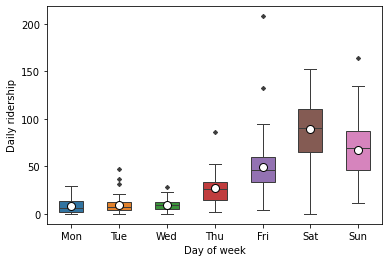

In [2]:
sns.boxplot(x='Day of Week', y='Passengers', data=daily_ridership_AV,
           linewidth = 1, 
            saturation=0.75, 
            width=0.5,
            flierprops = dict(marker='D', markersize=3),
            showmeans = True, 
            meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                      "markersize":"8"})
plt.xlabel('Day of week')
plt.ylabel('Daily ridership')

In [3]:
# Monday, Tuesday, Wednesday, Thursday
weekday = ['Mon', 'Tue', 'Wed', 'Thu']
weekend = ['Fri', 'Sat', 'Sun']
df_weekday_ridership = daily_ridership_AV[daily_ridership_AV['Day of Week'].isin(weekday)]
df_weekend_ridership = daily_ridership_AV[daily_ridership_AV['Day of Week'].isin(weekend)]

In [4]:
#df_ridership = np.sort(daily_ridership_AV['Passengers'])
#df_ridership
df_weekday = np.sort(df_weekday_ridership['Passengers'])
df_weekday = df_weekday[df_weekday != 0] # delete those zero
df_weekend = np.sort(df_weekend_ridership['Passengers'])
df_weekend = df_weekend[df_weekend != 0] # delete those zero

In [46]:
np.mean(df_weekday)

15.147435897435898

In [5]:
## df_weekday
from scipy import stats
list_of_dists = ['alpha','beta','cauchy','chi','chi2','cosine','expon','exponnorm',
                 'exponpow','gamma','halfcauchy','halfnorm','invgamma','laplace',
                 'loggamma','loglaplace','lognorm','norm','reciprocal','t','uniform']
results = []
for i in list_of_dists:
    dist = getattr(stats, i)
    param = dist.fit(df_weekday)
    a = stats.kstest(df_weekday, i, args=param)
    results.append((i,a[0],a[1]))
    
    
results.sort(key=lambda x:float(x[2]), reverse=True)
for j in results:
    print("{}: statistic={}, pvalue={}".format(j[0], j[1], j[2]))

D:\Software\Anaconda\Install\envs\gpd_env\lib\site-packages\scipy\stats\_distn_infrastructure.py:2640: RuntimeWarning: invalid value encountered in double_scalars
  Lhat = muhat - Shat*mu
D:\Software\Anaconda\Install\envs\gpd_env\lib\site-packages\scipy\stats\_continuous_distns.py:647: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)
D:\Software\Anaconda\Install\envs\gpd_env\lib\site-packages\scipy\optimize\_minpack_py.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


lognorm: statistic=0.05153401955660214, pvalue=0.7820088896853485
exponnorm: statistic=0.05281514363292558, pvalue=0.7564889977952958
invgamma: statistic=0.059274369532851645, pvalue=0.6217469134510853
gamma: statistic=0.06639576976656777, pvalue=0.47711438670800443
beta: statistic=0.06646695723099619, pvalue=0.4757457474429545
alpha: statistic=0.071123969910805, pvalue=0.3907704272526209
loglaplace: statistic=0.08888333685651567, pvalue=0.16002930691151762
chi: statistic=0.09615312475098785, pvalue=0.10459866583908517
expon: statistic=0.0990005338728773, pvalue=0.0877429085384821
halfcauchy: statistic=0.11147585991966746, pvalue=0.0382428142192891
exponpow: statistic=0.13042182938929714, pvalue=0.008969826814222873
halfnorm: statistic=0.14271220411610808, pvalue=0.0030983420125170885
t: statistic=0.14360598040052686, pvalue=0.002857065348582516
laplace: statistic=0.1665411369867798, pvalue=0.0002993180921297185
cauchy: statistic=0.17444617262163464, pvalue=0.00012712901143320662
logga

D:\Software\Anaconda\Install\envs\gpd_env\lib\site-packages\scipy\stats\_continuous_distns.py:5350: RuntimeWarning: divide by zero encountered in true_divide
  return c**2 / (c**2 - n**2)


In [54]:
n = 40
density = np.zeros((n,1))
nmax = max(df_weekday)
nmin = min(df_weekday)
bandwidth = (nmax-nmin)/n
bins = np.arange(nmin, nmax, bandwidth)
for i in range (len(df_weekday)):
    index = int(df_weekday[i]/bandwidth)
    if index >= n:
        index = n-1
    density[index] = density[index] + 1
density = density/len(df_weekday)
density = density.reshape(1,-1)[0]

data_pdf = []
for i in range (len(df_weekday)):
    index = int(df_weekday[i]/bandwidth)
    if index >= n:
        index = n-1
    data_pdf.append(density[index])
data_pdf = np.array(data_pdf)

In [59]:
fit_alpha, fit_loc, fit_beta = stats.lognorm.fit(df_weekday, floc=0)

In [52]:
stats.lognorm.fit(df_weekday, floc=0)

(0.8890635696809736, 0.0, 10.621766755388062)

In [63]:
fit_alpha**2

0.7904340309338753

In [62]:
np.log(fit_beta)

2.3629053631249635

In [61]:
np.exp(np.log(fit_beta) + fit_alpha**2/2)

15.770204658347351

In [55]:
## lognorm
fit_alpha, fit_loc, fit_beta=stats.lognorm.fit(df_weekday, floc=0)
lognorm_pdf=stats.lognorm.pdf(df_weekday,fit_alpha, fit_loc, fit_beta)

coefficient_of_dermination = np.corrcoef(data_pdf, lognorm_pdf)
coefficient_of_dermination = coefficient_of_dermination[0,1]**2
print(coefficient_of_dermination)
MSE = np.sum((data_pdf-lognorm_pdf)**2)/len(data_pdf)
MSE

0.7310630158621425


0.0019473025242611193

In [26]:
## alpha
fit_alpha, fit_loc, fit_beta=stats.alpha.fit(df_weekday)
alpha_pdf=stats.alpha.pdf(df_weekday,fit_alpha, fit_loc, fit_beta)

coefficient_of_dermination = np.corrcoef(data_pdf, alpha_pdf)
coefficient_of_dermination = coefficient_of_dermination[0,1]**2
print(coefficient_of_dermination)
MSE = np.sum((data_pdf-alpha_pdf)**2)/len(data_pdf)
MSE

0.7970335579267459


D:\Software\Anaconda\Install\envs\gpd_env\lib\site-packages\scipy\stats\_distn_infrastructure.py:2640: RuntimeWarning: invalid value encountered in double_scalars
  Lhat = muhat - Shat*mu


0.0019480425432187348

In [27]:
## invgamma
fit_alpha, fit_loc, fit_beta=stats.invgamma.fit(df_weekday)
invgamma_pdf=stats.invgamma.pdf(df_weekday,fit_alpha, fit_loc, fit_beta)

coefficient_of_dermination = np.corrcoef(data_pdf, invgamma_pdf)
coefficient_of_dermination = coefficient_of_dermination[0,1]**2
print(coefficient_of_dermination)
MSE = np.sum((data_pdf-invgamma_pdf)**2)/len(data_pdf)
MSE

0.792430232738462


0.0019392748010951429

In [28]:
## gamma
fit_alpha, fit_loc, fit_beta=stats.gamma.fit(df_weekday)
gamma_pdf=stats.gamma.pdf(df_weekday,fit_alpha, fit_loc, fit_beta)

coefficient_of_dermination = np.corrcoef(data_pdf, gamma_pdf)
coefficient_of_dermination = coefficient_of_dermination[0,1]**2
print(coefficient_of_dermination)
MSE = np.sum((data_pdf-gamma_pdf)**2)/len(data_pdf)
MSE

0.677687783617251


0.0021934830453305006

D:\Software\Anaconda\Install\envs\gpd_env\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Weekday Group - Sample size: n=156')

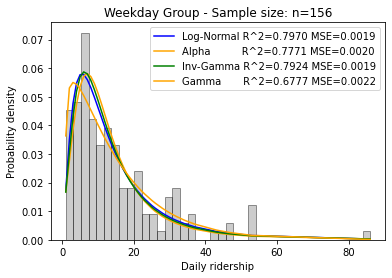

In [31]:
# fitting distribution curves
sns.distplot(a=df_weekday, bins=40, kde=False, norm_hist = True, color='grey',
             hist_kws={"edgecolor": 'black'})
l1, = plt.plot(df_weekday,lognorm_pdf, color = 'blue')
l2, = plt.plot(df_weekday,alpha_pdf, color = 'orange')
l3, = plt.plot(df_weekday,invgamma_pdf, color = 'green')
l4, = plt.plot(df_weekday,gamma_pdf, color = 'orange')
plt.legend(['Log-Normal R^2=0.7970 MSE=0.0019',
            'Alpha          R^2=0.7771 MSE=0.0020',
            'Inv-Gamma R^2=0.7924 MSE=0.0019',
            'Gamma       R^2=0.6777 MSE=0.0022'])
plt.xlabel('Daily ridership')
plt.ylabel('Probability density')
plt.title('Weekday Group - Sample size: n=156')

In [32]:
## df_weekend
from scipy import stats
list_of_dists = ['alpha','beta','cauchy','chi','chi2','cosine','expon','exponnorm',
                 'exponpow','gamma','halfcauchy','halfnorm','invgamma','laplace',
                 'loggamma','loglaplace','lognorm','norm','reciprocal','t','uniform']
results = []
for i in list_of_dists:
    dist = getattr(stats, i)
    param = dist.fit(df_weekend)
    a = stats.kstest(df_weekend, i, args=param)
    results.append((i,a[0],a[1]))
    
    
results.sort(key=lambda x:float(x[2]), reverse=True)
for j in results:
    print("{}: statistic={}, pvalue={}".format(j[0], j[1], j[2]))

D:\Software\Anaconda\Install\envs\gpd_env\lib\site-packages\scipy\stats\_distn_infrastructure.py:2640: RuntimeWarning: invalid value encountered in double_scalars
  Lhat = muhat - Shat*mu


beta: statistic=0.03768539779251512, pvalue=0.9875492836303444
chi: statistic=0.037857814299280146, pvalue=0.9869169505996512
gamma: statistic=0.0443680385047428, pvalue=0.9439392639023318
lognorm: statistic=0.04701206011284853, pvalue=0.9148203500902933
invgamma: statistic=0.0477186855756091, pvalue=0.9059155620742355
exponnorm: statistic=0.055411678444037826, pvalue=0.7839941109335913
t: statistic=0.058212198547529015, pvalue=0.7317365536528915
loglaplace: statistic=0.06701051639359878, pvalue=0.5611190137854998
norm: statistic=0.07213897061440572, pvalue=0.4667208562637841
loggamma: statistic=0.07340499788656407, pvalue=0.44466407631817717
laplace: statistic=0.09884284123072962, pvalue=0.13630318891367388
cauchy: statistic=0.10960844421575383, pvalue=0.07403518571988255
halfnorm: statistic=0.1710743183006737, pvalue=0.0006729394796544108
cosine: statistic=0.20107915867192316, pvalue=3.168628572203645e-05
halfcauchy: statistic=0.22360754243115277, pvalue=2.2867807008269648e-06
expon:

D:\Software\Anaconda\Install\envs\gpd_env\lib\site-packages\scipy\stats\_continuous_distns.py:5350: RuntimeWarning: divide by zero encountered in true_divide
  return c**2 / (c**2 - n**2)


In [33]:
n = 40
density = np.zeros((n,1))
nmax = max(df_weekend)
nmin = min(df_weekend)
bandwidth = (nmax-nmin)/n
bins = np.arange(nmin, nmax, bandwidth)
for i in range (len(df_weekend)):
    index = int(df_weekend[i]/bandwidth)
    if index >= n:
        index = n-1
    density[index] = density[index] + 1
density = density/len(df_weekend)
density = density.reshape(1,-1)[0]

data_pdf = []
for i in range (len(df_weekend)):
    index = int(df_weekend[i]/bandwidth)
    if index >= n:
        index = n-1
    data_pdf.append(density[index])
data_pdf = np.array(data_pdf)

In [71]:
fit_df, fit_loc, fit_scale=stats.chi.fit(df_weekend, floc=0)

In [78]:
fit_scale

55.37744534536037

In [75]:
np.mean(df_weekend)

69.21641791044776

In [77]:
aa = np.sqrt(2) * math.gamma((fit_df+1)/2)/math.gamma(fit_df/2)
aa*fit_scale

69.2073525271839

In [35]:
## chi
fit_df, fit_loc, fit_scale=stats.chi.fit(df_weekend)
chi_pdf=stats.chi.pdf(df_weekend,fit_df, fit_loc, fit_scale)

coefficient_of_dermination = np.corrcoef(data_pdf, chi_pdf)
coefficient_of_dermination = coefficient_of_dermination[0,1]**2
print(coefficient_of_dermination)
MSE = np.sum((data_pdf-chi_pdf)**2)/len(data_pdf)
MSE

0.47263772999551223


0.0019683754715638965

In [36]:
## gamma
fit_alpha, fit_loc, fit_beta=stats.gamma.fit(df_weekend)
gamma_pdf=stats.gamma.pdf(df_weekend,fit_alpha, fit_loc, fit_beta)

coefficient_of_dermination = np.corrcoef(data_pdf, gamma_pdf)
coefficient_of_dermination = coefficient_of_dermination[0,1]**2
print(coefficient_of_dermination)
MSE = np.sum((data_pdf-gamma_pdf)**2)/len(data_pdf)
MSE

0.47222762106092653


0.0019489363298935036

In [37]:
## invgamma
fit_alpha, fit_loc, fit_beta=stats.invgamma.fit(df_weekend)
invgamma_pdf=stats.invgamma.pdf(df_weekend,fit_alpha, fit_loc, fit_beta)

coefficient_of_dermination = np.corrcoef(data_pdf, invgamma_pdf)
coefficient_of_dermination = coefficient_of_dermination[0,1]**2
print(coefficient_of_dermination)
MSE = np.sum((data_pdf-invgamma_pdf)**2)/len(data_pdf)
MSE

0.48448789695644723


0.0019410170675271162

In [38]:
## lognorm
fit_alpha, fit_loc, fit_beta=stats.lognorm.fit(df_weekend)
lognorm_pdf=stats.lognorm.pdf(df_weekend,fit_alpha, fit_loc, fit_beta)

coefficient_of_dermination = np.corrcoef(data_pdf, lognorm_pdf)
coefficient_of_dermination = coefficient_of_dermination[0,1]**2
print(coefficient_of_dermination)
MSE = np.sum((data_pdf-lognorm_pdf)**2)/len(data_pdf)
MSE

0.4813786713412837


0.0019427387958839465

D:\Software\Anaconda\Install\envs\gpd_env\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Weekend Group - Sample size: n=134')

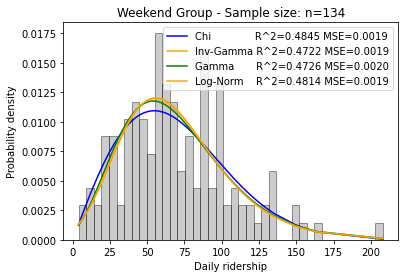

In [40]:
# fitting distribution curves
sns.distplot(a=df_weekend, bins=40, kde=False, norm_hist = True, color='grey',
             hist_kws={"edgecolor": 'black'})
l1, = plt.plot(df_weekend,chi_pdf, color = 'blue')
l2, = plt.plot(df_weekend,invgamma_pdf, color = 'orange')
l3, = plt.plot(df_weekend,gamma_pdf, color = 'green')
l4, = plt.plot(df_weekend,lognorm_pdf, color = 'orange')
plt.legend(['Chi              R^2=0.4845 MSE=0.0019',
            'Inv-Gamma R^2=0.4722 MSE=0.0019',
            'Gamma       R^2=0.4726 MSE=0.0020',
            'Log-Norm    R^2=0.4814 MSE=0.0019'])
plt.xlabel('Daily ridership')
plt.ylabel('Probability density')
plt.title('Weekend Group - Sample size: n=134')